Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<ipython-input-8-e7174e466e6d>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])  # Formatar ticks do eixo y em porcentagem


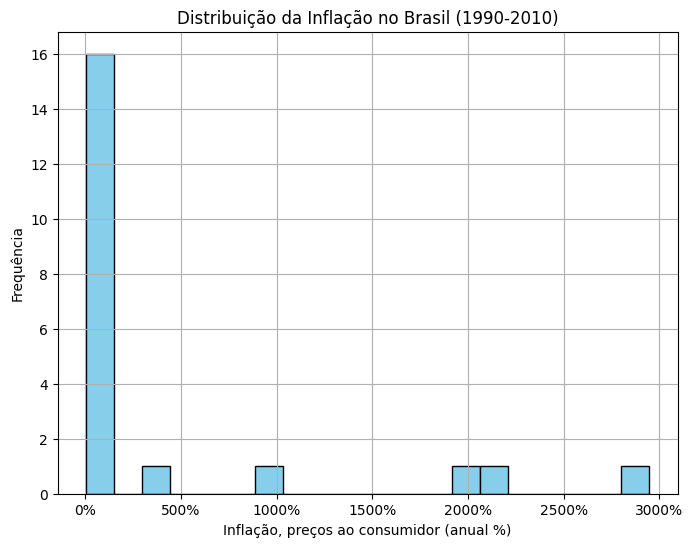

In [8]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# Função para montar o Google Drive
def montar_drive():
    """Monta o Google Drive no Colab para acesso aos dados."""
    drive.mount('/content/gdrive')

# Função para carregar dados de um arquivo CSV
def carregar_dados(caminho, conjunto_dados):
    """Carrega o conjunto de dados do Google Drive.

    Args:
        caminho (str): O caminho para o diretório no Google Drive.
        conjunto_dados (str): O nome do arquivo do conjunto de dados.

    Returns:
        pd.DataFrame: O conjunto de dados carregado.
    """
    caminho_conjunto_dados = caminho + conjunto_dados
    try:
        return pd.read_csv(caminho_conjunto_dados, sep=';', decimal=',')
    except FileNotFoundError:
        raise FileNotFoundError(f"Arquivo não encontrado na pasta. {caminho_conjunto_dados}")

# Função para filtrar e analisar dados
def analisar_dados(dados_banco_dados, indicador, codigo_pais, inicio, fim):
    """Filtra e analisa dados para um indicador, país e intervalo de anos específicos.

    Args:
        dados_banco_dados (pd.DataFrame): O conjunto de dados a ser filtrado.
        indicador (str): O nome do indicador para filtrar.
        codigo_pais (str): O código do país.
        inicio (int): Ano inicial do intervalo desejado.
        fim (int): Ano final do intervalo desejado.

    Returns:
        pd.Series: Os dados filtrados para o indicador, país e intervalo de anos especificados.
    """
    anos = [str(ano) for ano in range(inicio, fim + 1)]
    dados_filtrados = dados_banco_dados[
        (dados_banco_dados['Indicator Name'].str.contains(indicador)) &
        (dados_banco_dados['Country Code'] == codigo_pais)
    ][anos]

    if dados_filtrados.empty:
        raise ValueError("Nenhum dado encontrado para os critérios especificados.")

    return dados_filtrados.values.flatten()

# Configurações
caminho = '/content/gdrive/MyDrive/'
conjunto_dados = 'wdi_paises_america_sul_series_validas.csv'
pais = 'BRA'
ano_inicio = 1990
ano_fim = 2010

# Montar o Google Drive
montar_drive()

# Carregar o conjunto de dados
dados_banco_dados = carregar_dados(caminho, conjunto_dados)

# Analisar os dados de inflação para o Brasil entre 1990 e 2010
try:
    dados_inflacao = analisar_dados(dados_banco_dados, 'Inflation, consumer prices', pais, ano_inicio, ano_fim)

    # Plotar o histograma
    plt.figure(figsize=(8, 6))
    plt.hist(dados_inflacao, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Inflação, preços ao consumidor (anual %)')
    plt.ylabel('Frequência')
    plt.title('Distribuição da Inflação no Brasil (1990-2010)')
    plt.grid(True)
    plt.gca().set_xticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_xticks()])  # Formatar ticks do eixo y em porcentagem
    plt.show()

except FileNotFoundError as e:
    print(f"Erro: {e}")
except ValueError as e:
    print(f"Erro: {e}")
